## **Background Removal using TRACER - State of the Art RGB Salient Object Detector**

Created a forked repo of TRACER, and made changes there itself, to output images with segmentation masks applied to the original images rather than just simple binary masks.

Dataset Generated: [Background Removed Happywhale Dataset](https://www.kaggle.com/adnanpen/background-removed-happywhale-dataset)

Accordingly made changes to code from testing files to remove evaluation part.

Dataset used for background removal: [Cropped 512x512](https://www.kaggle.com/phalanx/whale2-cropped-dataset)

Original TRACER repo: [TRACER](https://github.com/Karel911/TRACER)

My forked TRACER repo: [TRACER](https://github.com/adnan119/TRACER)

Files modified include: 
[trainer.py](https://github.com/adnan119/TRACER/blob/main/trainer.py) 
[dataloader.py](https://github.com/adnan119/TRACER/blob/main/dataloader.py)
[main.py](https://github.com/adnan119/TRACER/blob/main/main.py)

In [ ]:
!git clone https://github.com/adnan119/TRACER.git

In [ ]:
!wget https://github.com/Karel911/TRACER/releases/download/v1.0/TRACER-Efficient-7.pth

In [ ]:
!mv ./TRACER-Efficient-5.pth ./best_model.pth

In [ ]:
%cd ./TRACER
!mkdir ./results/
!mkdir ./results/DUTS/
!mkdir ./results/DUTS/TE7_0/

In [ ]:
!mv ../best_model.pth ./results/DUTS/TE7_0/

# <h1 style = "font-family: garamond; font-size: 40px; font-style: normal; letter-spcaing: 3px; background-color: #f6f5f5; color :#fe346e; border-radius: 100px 100px; text-align:center">Imports </h1>

In [31]:
import os
import gc
import cv2
import math
import copy
import time
import random
import warnings
import shutil
from pathlib import Path

#For data manipulation
import numpy as np
import pandas as pd
from PIL import Image

import torch
import torch.nn as nn
import torch.nn.functional as F
os.environ['TORCH_HOME']= '/workspace/cache'

**Segmenting the training set**

In [17]:
#segment test images 
!python main.py test --exp_num 0 --arch 7 --img_size 512 --batch_size 16 --dataset "DUTS" --save_map True --data_path ../input/cropped_train_images/cropped_train_images/

<---- Training Params ---->
Namespace(RFB_aggregated_channel=[32, 64, 128], action='test', arch='7', aug_ver=2, batch_size=16, channels=[24, 40, 112, 320], clipping=2, criterion='API', data_path='../input/cropped_train_images/cropped_train_images/', dataset='DUTS', denoise=0.93, epochs=100, exp_num='0', frequency_radius=16, gamma=0.1, img_size=512, lr=5e-05, lr_factor=0.1, model_path='results/', multi_gpu=True, num_workers=4, optimizer='Adam', patience=5, save_map=True, scheduler='Reduce', seed=42, weight_decay=0.0001)
Loaded pretrained weights for efficientnet-b7
###### pre-trained Model restored #####
test length : 51033
100%|███████████████████████████████████████| 3190/3190 [57:27<00:00,  1.08s/it]
Loaded pretrained weights for efficientnet-b7
###### pre-trained Model restored #####
test length : 51033
100%|███████████████████████████████████████| 3190/3190 [56:32<00:00,  1.06s/it]
Loaded pretrained weights for efficientnet-b7
###### pre-trained Model restored #####
test length : 5

In [18]:
#create zipfile 
shutil.make_archive('./seg_img', 'zip', './seg_img')

'/workspace/happy-whale/TRACER-main/seg_img.zip'

In [19]:
!ls

LICENSE						img		  seg_img
README.md					main.py		  seg_img.zip
__pycache__					model		  trainer.py
background-removal-using-tracer-sota-sod.ipynb	modules		  util
config.py					pred_map	  w.o_edges
dataloader.py					requirements.txt
edge_generator.py				results


In [20]:
seg = os.listdir("./seg_img/") # os.listdir("../input/background-removed-happywhale-dataset/seg_img")
print(len(seg))

51033


In [26]:
img_num = 17009 #sample test image index
img_name = Path(seg[img_num]).stem

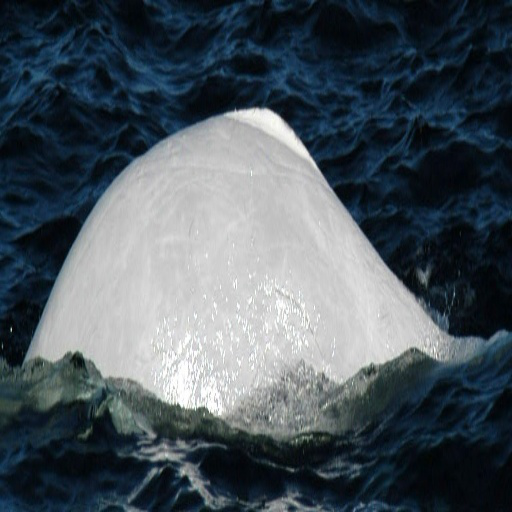

In [32]:
test_dir = '../input/cropped_train_images/cropped_train_images/'
pil_tes = Image.open(test_dir + img_name + ".jpg")
display(pil_tes)

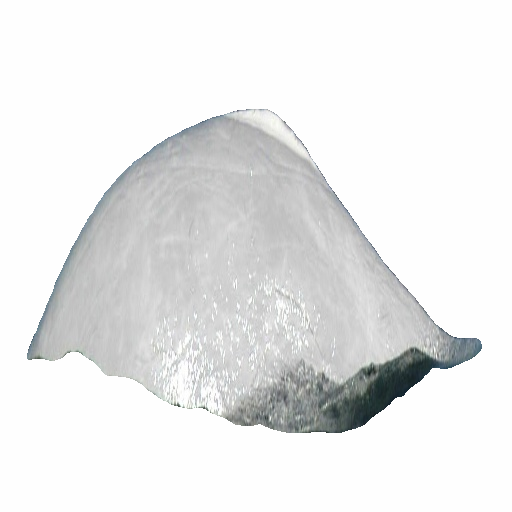

In [33]:
pil_im = Image.open("./seg_img/" + img_name + ".png") # Image.open("../input/background-removed-happywhale-dataset/seg_img/" + img_name + ".png")
display(pil_im)

In [34]:
!rm -r './seg_img' #remove the folder containing the segmented images for saving the zipfile